# Classificaçao do Dataset com o K-Prototypes, usando as variáveis categóricas *status-diferenciada*  e *status_especial* 


###  Notebook: `02-2_classificacao_k-prototypes_(diferenciados_especiais)`

## 1. Importação das bibliotecas essenciais

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

## 2. Importação do dataset

---

O dataset importado a seguir foi criado no notebook `01_tratamento_de_dados_classificacao-final` e será classificado com o 
algoritmo K-Prototypes, uma vez que a classificação com campos numéricos apenas, usando o algoritmo K-Means++, não resultou em agrupamentos úteis.

Para essa análise, usarei apenas as variáveis categóricas *status_diferenciada* e *status_especial*.

---


In [2]:
dataset_base_class = pd.read_csv('puc_tcc_dataset_classif_final.csv')

## 4. Teste de classificação do dataset com K-Prototype

### 4.1 Ajustando  o dataset para clusterização

In [3]:
dataset_base_class.head()

,nr_pessoa_juridica,status_diferenciada,status_especial,pj_receita_bruta,pj_arrecadacao,dctf_valor_debito,dctf_valor_pago,dctf_valor_comp_dcomp,dctf_valor_comp_processo,dctf_valor_deducao_darf,...,dctf_valor_parcelado,dctf_valor_saldo_pagar,debitos_total_devedor,debitos_total_susp_judicial,debitos_total_susp_admin,debitos_total_pend_comp,credito_total_perdcomp,Porte_Grande,Porte_Médio,Porte_Pequeno
0,27018624,0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1
1,12048428,0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1
2,18107915,0,0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1
3,27360348,0,0,0.0,0.00,30462.79,0.00,0.0,0.0,0.0,...,0.0,30462.79,0.0,0.0,0.0,0.0,0.0,0,0,1
4,15969714,0,0,0.0,15401.09,28152.53,28152.53,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,1


---
O algoritmo K-Prototypes classifica, em conjunto, dados quantitativos e categóricos e, neste caso, excluíremos o campo `nr_pessoa_juridica`, que será usado apenas para identificar os contribuintes após a clusterização para a segunda coleta de dados que será realizada para gerar o dataset com as séries temporais, e os campos categóricos  `Porte_Grande`, `Porte_Médio`, e `Porte_Pequeno`, que não serão usados nesse modelo.

---

In [4]:
dataset_cluster = dataset_base_class.iloc[:, [2,3,4,5,7,8,9,10,11,12,13,14,15,16,17]].values

In [5]:
pd.DataFrame(dataset_cluster).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00,30462.79,0.0,0.0,0.0,0.0,0.0,30462.79,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,15401.09,28152.53,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


### 4.2 Normalizando a escala


---
Conforme visto no notebook `01_tratamento_de_dados_classificacao-final`, o dataset possui diversos outliers e uma grande dispersão dos dados, entretanto, como os outliers são representativos do setor econômico e o acompanhamento de sua arrecadação é essencial para a atividade da RFB, serão mantidos. Junto a isso, alguns campos, como `pj_receita_bruta` possuem uma escala muito maior que outros campos, de modo que é possível que o primeiro distorça a classificação.

Diante disso, normalizarei o dataset antes da classificação.

A normalização incluirá os campos categóricos convertidos em binários no dataset. Testes realizados anteriormente mostraram não haver diferença em normalizar o dataset com todos os valores ou normalizar apenas os valores numéricos e depois concatenar os valores categóricos.

---

In [6]:
from sklearn.preprocessing import Normalizer

dc_normalizer = Normalizer()

dataset_cluster_normalized = dc_normalizer.fit_transform(dataset_cluster)

print(dataset_cluster_normalized)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 9.98404100e-01 3.54713307e-02 ... 0.00000000e+00
  0.00000000e+00 3.73412604e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.74896165e-01 1.67512501e-01 ... 0.00000000e+00
  0.00000000e+00 6.55402058e-05]]


### 4.3 Verificando o número ótimo de clusters com o Método do Cotovelo (Elbow Method)

---

Para determinar o número ótimo de clusters a partir do dataset normalizado, vou usar o Método do Cotovelo, buscando o ponto onde há inflexão da curva, testando de 2 a 15 clusters.

O algoritmo K-Prototypes implementado em Python possui as mesmas interfaces do K-Means, de modo que o código gerado será similar, com a diferença de que o K-Prototypes gera o custo de cada agrupamento ao invés da inércia.

O algoritmo K-Prototypes classifica os elementos do dataset a partir da definição de protótipos que agregam as características quantitativas (através de uma medida de distância) e as qualitativas (através de uma medida de similaridade) e definem um centróide. Após a seleção inicial dos centróides, todos os elementos do dataset são alocados a um cluster e a medida de similaridade é testada novamente contra os protótipos e, se algum elemento estiver mais próximo de outro protótipo, os clusters são atualizados e os protótipos recalculados. O algoritmo transcorre até que não haja mais realocações a serem feitas.

Na saída do processamento abaixo, a iteração marcada com a melhor é a última que houve realocação.

Em relação ao hiperparâmetro init, foram testados os dois disponíveis na implementação em Python ('Huang'e 'Cao') e a inicialização 'Cao' apresentou melhores resultados, sem clusters com poucos ou nenhum elemento. 

---

In [7]:
from kmodes.kprototypes import KPrototypes

In [8]:

cost = []

for i in range(2,15):
    kprototypes = KPrototypes(n_clusters = i, init = 'Cao',verbose = 1, n_init = 6, n_jobs=12, random_state=406)
    kprototypes.fit(dataset_cluster_normalized, categorical=[0,1])
    cost.append(kprototypes.cost_)
    


Best run was number 4
Best run was number 4
Best run was number 2
Best run was number 2
Best run was number 2
Best run was number 5
Best run was number 3
Best run was number 4
Best run was number 4
Best run was number 1
Best run was number 4
Best run was number 2
Best run was number 6


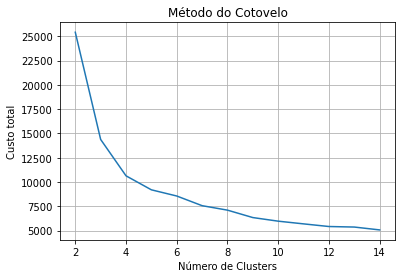

In [9]:
plt.plot(range(2, 15), cost)
plt.grid()
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Custo total')
plt.savefig('02-2_k-proto_metodo_cotovelo.png')
plt.show()

---
Considerando que o teste com o Método do Cotovelo não foi conclusivo, já que é possível que o número ideal seja de 4 ou 5 clusters, e que o método de Análise de Silhueta, para tentar identificar o número ótimo de clusters, não se aplica à classificação em tela porque o algoritmo K-Prototypes usa duas medidas distintas para agregação (uma para os valores quantitativos e outra para os valores categóricos), irei analisar os resultados para 4 e 5 clusters.

___

### 4.4 Treinando o algoritmo K-Prototypes

In [10]:
#from kmodes.kprototypes import KPrototypes

kproto4 =  KPrototypes(n_clusters = 4, init = 'Cao',verbose = 1, n_init = 6, n_jobs = 12, random_state=406)
y_kproto4 = kproto4.fit_predict(dataset_cluster_normalized, categorical=[0,1])

kproto5 =  KPrototypes(n_clusters = 5, init = 'Cao',verbose = 1,  n_init = 6, n_jobs = 12, random_state=406)
y_kproto5 = kproto5.fit_predict(dataset_cluster_normalized, categorical=[0,1])


Best run was number 2
Best run was number 2


### 4.5 Separando os agrupamentos para análise e identificação

### Análise dos clusters

---
Em primeiro lugar, após a geração de um dataset com a solução encontrada para cada número de clusters, totalizei os valores das colunas para cada cluster em um dataframe nomeado `cluster_X`, onde X é o total de clusters criados.


A partir dos totais por cluster, avaliei cada solução com base em alguns indicadores, a saber:

<ol>
    <li>Arrecadação x Receita Bruta: avalia a parcela de valores arrecadados em relação à Receita Bruta dos integrantes do Cluster</li>
    <li>Débito Declarado x Arrecadação: avalia se houve arrecadação atípica, decorrente do recolhimento de autos de infração, por exemplo, que não são declarados em DCTF</li>
    <li>Valor Pago x Débito Declarado: avalia o quanto foi pago em DARF para quitar os débitos declarados</li>
    <li>Valor Compensado x Débito Declarado: avalia o quanto foi utilizado em créditos via PERDCOMP - transmitidos, ou não, em 2019 - para quitar os débitos declarados</li>
    <li>Valor Suspenso x Débito Declarado: avalia o quanto foi suspenso judicialmente, através de decisão ou por depósito, em relação ao débito declarado</li>
    <li>Saldo a pagar x Débito Declarado: avalia a inadimplência do contribuinte em relação ao débito declarado</li>
    <li>Dívida total x Receita Bruta: indica o volume de créditos tributários constituídos contra o contribuinte em relação à Receita Bruta, como proxy para a exposição do contribuinte</li>
    <li>Créditos vs Receita Bruta: avalia quanto o contribuinte apresentou em créditos contra a Fazenda Pública. Este valor tem relação com o indicador 4</li>
</ol>
    
---   

In [11]:
## Formatação das tabelas

pd.set_option('max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

#### 4.5.1 Análise `n_cluster= 4` clusters

In [12]:
dataset_kproto4 = dataset_base_class.copy()
dataset_kproto4 = dataset_kproto4.assign(cluster=pd.DataFrame(y_kproto4).values)

---
### Criação do Dataframe totalizando os valores por cluster

___

In [13]:
clusters_4 = pd.DataFrame(columns = ['cluster'])

clusters_4.cluster = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3']


for i in range(0,4):

    # Contagem de contribuintes por clusters

    clusters_4.at[i, 'contribuintes'] = len(dataset_kproto4[dataset_kproto4['cluster']==i])

    # Dados agregados de Receita do Bruta

    clusters_4.at[i,'receita_bruta_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].pj_receita_bruta)

    # Dados agregados de Arrecadação


    clusters_4.at[i,'arrecadacao_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].pj_arrecadacao)

    # Dados agregados do valor declarado de débitos

    clusters_4.at[i,'valor_debito_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].dctf_valor_debito)

    # Dados agregados do valor pago em DCTF

    clusters_4.at[i,'valor_pago_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].dctf_valor_pago)

    # Dados agregados de valores compensados

    clusters_4.at[i,'valor_compensado'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].dctf_valor_comp_dcomp)

    # Dados agregados de valores suspensos

    clusters_4.at[i,'valor_suspenso'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].dctf_valor_suspenso)

    # Dados agregados de Saldo a Pagar

    clusters_4.at[i,'saldo_pagar_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].dctf_valor_saldo_pagar)


    # Dados agregados de créditos apresentados em PER/DCOMP


    clusters_4.at[i,'dcomp_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].credito_total_perdcomp)

    # Dados agregados de débitos exigíveis em 31/12/2019

    clusters_4.at[i,'devedor_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].debitos_total_devedor)

    # Dados agregados de débitos suspensos judicialmente em 31/12/2019

    clusters_4.at[i,'judicial_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].debitos_total_susp_judicial)


    # Dados agregados de débitos suspensos administrativamente em 31/12/2019

    clusters_4.at[i,'admin_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].debitos_total_susp_admin)


    # Dados agregados de débitos totais constituídos em 31/12/2019

    total = (sum(dataset_kproto4[dataset_kproto4['cluster']==i].debitos_total_susp_admin) +
             sum(dataset_kproto4[dataset_kproto4['cluster']==i].debitos_total_susp_judicial) +
             sum(dataset_kproto4[dataset_kproto4['cluster']==i].debitos_total_devedor))

    clusters_4.at[i,'debitos_total'] = total


    # Dados agregados de créditos declarados contra a Fazenda Pública em 2019

    clusters_4.at[i,'credito_total'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].credito_total_perdcomp)



    # Contagem dos totais de contribuintes por variável categórica no cluster

    clusters_4.at[i,'Grande'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].Porte_Grande)
    clusters_4.at[i,'Médio'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].Porte_Médio)
    clusters_4.at[i,'Pequeno'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].Porte_Pequeno)

    clusters_4.at[i,'Diferenciados'] = (
        sum(dataset_kproto4[dataset_kproto4['cluster']==i].status_diferenciada) -
        sum(dataset_kproto4[dataset_kproto4['cluster']==i].status_especial))

    clusters_4.at[i,'Especiais'] = sum(dataset_kproto4[dataset_kproto4['cluster']==i].status_especial)



clusters_4.head(10)

,cluster,contribuintes,receita_bruta_total,arrecadacao_total,valor_debito_total,valor_pago_total,valor_compensado,valor_suspenso,saldo_pagar_total,dcomp_total,devedor_total,judicial_total,admin_total,debitos_total,credito_total,Grande,Médio,Pequeno,Diferenciados,Especiais
0,cluster 0,"113,049.00","2,286,976,985,585.91","310,244,599,554.98","181,793,564,689.61","140,427,958,746.54","28,381,559,504.00","2,974,006,082.93","5,209,284,163.84","58,785,722,044.10","24,831,443,615.03","48,408,523,463.31","390,594,383,032.51","463,834,350,110.85","58,785,722,044.10","1,669.00","4,142.00","107,238.00","1,246.00",423.00
1,cluster 1,"13,705.00","32,699,242,100.21","30,690,297,792.08","24,661,009,184.79","20,809,298,970.43","1,134,316,570.00","520,944,309.71","612,387,722.63","1,545,894,177.18","127,588,108.33","217,919,886.72","2,142,210,522.76","2,487,718,517.81","1,545,894,177.18",119.00,362.00,"13,224.00",89.00,30.00
2,cluster 2,"13,608.00","440,500,608.72","293,430,968.57","1,607,470,075.08","161,589,945.43","21,319,839.00","1,809,430.33","1,310,789,427.34","50,272,850.55","49,530,813.19","17,046,496.74","31,362,783.24","97,940,093.17","50,272,850.55",0.00,34.00,"13,574.00",0.00,0.00
3,cluster 3,"32,520.00","2,069,916,266.99","6,879,503,088.66","1,196,480,359.56","955,732,744.15","197,333,693.00","3,493,571.56","27,076,631.89","487,179,641.90","19,652,371.86","20,830,225.88","212,615,864.18","253,098,461.92","487,179,641.90",40.00,148.00,"32,332.00",37.00,3.00


---
### Criação do Dataframe com os indicadores

___

In [14]:
indicadores_4 = pd.DataFrame(columns = ['cluster'])

indicadores_4.cluster = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3']

for i in range(0, 4):

    indicadores_4.at[i, 'arrec_rb']= float(clusters_4[clusters_4.index==i].arrecadacao_total/
                                               clusters_4[clusters_4.index==i].receita_bruta_total)

    indicadores_4.at[i, 'debito_arrec']= float(clusters_4[clusters_4.index==i].valor_debito_total/
                                               clusters_4[clusters_4.index==i].arrecadacao_total)


    indicadores_4.at[i, 'pago_declarado']= float(clusters_4[clusters_4.index==i].valor_pago_total/
                                               clusters_4[clusters_4.index==i].valor_debito_total)

    indicadores_4.at[i, 'compensado_declarado']= float(clusters_4[clusters_4.index==i].valor_compensado/
                                               clusters_4[clusters_4.index==i].valor_debito_total)

    indicadores_4.at[i, 'suspenso_declarado']= float(clusters_4[clusters_4.index==i].valor_suspenso/
                                               clusters_4[clusters_4.index==i].valor_debito_total)


    indicadores_4.at[i, 'saldo_pagar_deb']= float(clusters_4[clusters_4.index==i].saldo_pagar_total/
                                               clusters_4[clusters_4.index==i].valor_debito_total)

    indicadores_4.at[i, 'divida_total_rb']= float(clusters_4[clusters_4.index==i].debitos_total/
                                               clusters_4[clusters_4.index==i].receita_bruta_total)

    indicadores_4.at[i, 'credito_rb']= float(clusters_4[clusters_4.index==i].credito_total/
                                               clusters_4[clusters_4.index==i].receita_bruta_total)


indicadores_4.head(10)


,cluster,arrec_rb,debito_arrec,pago_declarado,compensado_declarado,suspenso_declarado,saldo_pagar_deb,divida_total_rb,credito_rb
0,cluster 0,0.14,0.59,0.77,0.16,0.02,0.03,0.20,0.03
1,cluster 1,0.94,0.80,0.84,0.05,0.02,0.02,0.08,0.05
2,cluster 2,0.67,5.48,0.10,0.01,0.00,0.82,0.22,0.11
3,cluster 3,3.32,0.17,0.80,0.16,0.00,0.02,0.12,0.24


---

### Análise da solução de 4 clusters

Considerando os indicadores acima, bem como analisando a base de contribuintes, podemos nomear os clusters da seguinte forma:

<ul>
    <li>Cluster 0: Baixa Arrecadação Relativa</li>
    <li>Cluster 1: Alta Arrecadação com redução de litigância</li>
    <li>Cluster 2: Devedores Contumazes</li>
    <li>Cluster 3: Alta Arrecadação com valores atípicos</li>
</ul>

---

#### 4.5.2 Análise `n_cluster= 5` clusters

In [15]:
dataset_kproto5 = dataset_base_class.copy()
dataset_kproto5 = dataset_kproto5.assign(cluster=pd.DataFrame(y_kproto5).values)

---
### Criação do Dataframe totalizando os valores por cluster

___

In [16]:
clusters_5 = pd.DataFrame(columns = ['cluster'])

clusters_5.cluster = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']


for i in range(0,5):

    # Contagem de contribuintes por clusters

    clusters_5.at[i, 'contribuintes'] = len(dataset_kproto5[dataset_kproto5['cluster']==i])

    # Dados agregados de Receita do Bruta

    clusters_5.at[i,'receita_bruta_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].pj_receita_bruta)

    # Dados agregados de Arrecadação


    clusters_5.at[i,'arrecadacao_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].pj_arrecadacao)

    # Dados agregados do valor declarado de débitos

    clusters_5.at[i,'valor_debito_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].dctf_valor_debito)

    # Dados agregados do valor pago em DCTF

    clusters_5.at[i,'valor_pago_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].dctf_valor_pago)

    # Dados agregados de valores compensados

    clusters_5.at[i,'valor_compensado'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].dctf_valor_comp_dcomp)

    # Dados agregados de valores suspensos

    clusters_5.at[i,'valor_suspenso'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].dctf_valor_suspenso)

    # Dados agregados de Saldo a Pagar

    clusters_5.at[i,'saldo_pagar_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].dctf_valor_saldo_pagar)


    # Dados agregados de créditos apresentados em PER/DCOMP


    clusters_5.at[i,'dcomp_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].credito_total_perdcomp)

    # Dados agregados de débitos exigíveis em 31/12/2019

    clusters_5.at[i,'devedor_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].debitos_total_devedor)

    # Dados agregados de débitos suspensos judicialmente em 31/12/2019

    clusters_5.at[i,'judicial_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].debitos_total_susp_judicial)


    # Dados agregados de débitos suspensos administrativamente em 31/12/2019

    clusters_5.at[i,'admin_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].debitos_total_susp_admin)


    # Dados agregados de débitos totais constituídos em 31/12/2019

    total = (sum(dataset_kproto5[dataset_kproto5['cluster']==i].debitos_total_susp_admin) +
             sum(dataset_kproto5[dataset_kproto5['cluster']==i].debitos_total_susp_judicial) +
             sum(dataset_kproto5[dataset_kproto5['cluster']==i].debitos_total_devedor))

    clusters_5.at[i,'debitos_total'] = total


    # Dados agregados de créditos declarados contra a Fazenda Pública em 2019

    clusters_5.at[i,'credito_total'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].credito_total_perdcomp)



    # Contagem dos totais de contribuintes por variável categórica no cluster

    clusters_5.at[i,'Grande'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].Porte_Grande)
    clusters_5.at[i,'Médio'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].Porte_Médio)
    clusters_5.at[i,'Pequeno'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].Porte_Pequeno)

    clusters_5.at[i,'Diferenciados'] = (
        sum(dataset_kproto5[dataset_kproto5['cluster']==i].status_diferenciada) -
        sum(dataset_kproto5[dataset_kproto5['cluster']==i].status_especial))

    clusters_5.at[i,'Especiais'] = sum(dataset_kproto5[dataset_kproto5['cluster']==i].status_especial)



clusters_5.head(10)

,cluster,contribuintes,receita_bruta_total,arrecadacao_total,valor_debito_total,valor_pago_total,valor_compensado,valor_suspenso,saldo_pagar_total,dcomp_total,devedor_total,judicial_total,admin_total,debitos_total,credito_total,Grande,Médio,Pequeno,Diferenciados,Especiais
0,cluster 0,"111,524.00","2,281,908,065,769.33","308,160,190,691.67","180,017,621,071.97","140,252,567,967.93","27,147,159,600.00","2,639,384,541.89","5,179,409,152.69","57,617,186,404.16","18,262,555,137.75","45,748,020,740.58","388,143,679,936.98","452,154,255,815.31","57,617,186,404.16","1,665.00","4,123.00","105,736.00","1,244.00",421.00
1,cluster 1,"13,699.00","32,687,565,760.73","30,679,986,034.78","24,655,775,205.55","20,804,047,823.06","1,134,095,387.00","520,944,309.71","612,784,639.32","1,545,617,440.29","120,642,884.12","217,919,886.72","2,135,892,127.07","2,474,454,897.91","1,545,617,440.29",119.00,362.00,"13,218.00",89.00,30.00
2,cluster 2,"13,572.00","439,759,303.61","284,433,149.52","1,584,466,957.47","160,342,025.81","21,309,384.00","1,809,430.33","1,289,480,819.04","50,219,445.32","16,161,071.93","17,046,496.74","30,123,078.13","63,330,646.80","50,219,445.32",0.00,31.00,"13,541.00",0.00,0.00
3,cluster 3,"32,457.00","2,069,916,266.99","6,878,371,682.43","1,196,433,749.29","955,723,390.17","197,333,693.00","3,493,571.56","27,039,375.60","487,178,315.77","18,432,764.37","20,830,225.88","212,615,864.18","251,878,854.43","487,178,315.77",40.00,148.00,"32,269.00",37.00,3.00
4,cluster 4,"1,630.00","5,081,337,461.17","2,104,849,845.89","1,804,227,324.76","181,899,199.58","1,234,631,542.00","334,621,541.04","50,823,959.05","1,168,867,108.19","6,610,423,050.24","2,660,502,722.73","2,458,261,196.33","11,729,186,969.30","1,168,867,108.19",4.00,22.00,"1,604.00",2.00,2.00


---
### Criação do Dataframe com os indicadores

___

In [17]:
indicadores_5 = pd.DataFrame(columns = ['cluster'])

indicadores_5.cluster = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']

for i in range(0, 5):

    indicadores_5.at[i, 'arrec_rb']= float(clusters_5[clusters_5.index==i].arrecadacao_total/
                                               clusters_5[clusters_5.index==i].receita_bruta_total)

    indicadores_5.at[i, 'debito_arrec']= float(clusters_5[clusters_5.index==i].valor_debito_total/
                                               clusters_5[clusters_5.index==i].arrecadacao_total)


    indicadores_5.at[i, 'pago_declarado']= float(clusters_5[clusters_5.index==i].valor_pago_total/
                                               clusters_5[clusters_5.index==i].valor_debito_total)

    indicadores_5.at[i, 'compensado_declarado']= float(clusters_5[clusters_5.index==i].valor_compensado/
                                               clusters_5[clusters_5.index==i].valor_debito_total)

    indicadores_5.at[i, 'suspenso_declarado']= float(clusters_5[clusters_5.index==i].valor_suspenso/
                                               clusters_5[clusters_5.index==i].valor_debito_total)


    indicadores_5.at[i, 'saldo_pagar_deb']= float(clusters_5[clusters_5.index==i].saldo_pagar_total/
                                               clusters_5[clusters_5.index==i].valor_debito_total)

    indicadores_5.at[i, 'divida_total_rb']= float(clusters_5[clusters_5.index==i].debitos_total/
                                               clusters_5[clusters_5.index==i].receita_bruta_total)

    indicadores_5.at[i, 'credito_rb']= float(clusters_5[clusters_5.index==i].credito_total/
                                               clusters_5[clusters_5.index==i].receita_bruta_total)


indicadores_5.head(10)


,cluster,arrec_rb,debito_arrec,pago_declarado,compensado_declarado,suspenso_declarado,saldo_pagar_deb,divida_total_rb,credito_rb
0,cluster 0,0.14,0.58,0.78,0.15,0.01,0.03,0.20,0.03
1,cluster 1,0.94,0.80,0.84,0.05,0.02,0.02,0.08,0.05
2,cluster 2,0.65,5.57,0.10,0.01,0.00,0.81,0.14,0.11
3,cluster 3,3.32,0.17,0.80,0.16,0.00,0.02,0.12,0.24
4,cluster 4,0.41,0.86,0.10,0.68,0.19,0.03,2.31,0.23


---

### Análise da solução de 5 clusters

Considerando os indicadores acima, bem como analisando a base de contribuintes, podemos nomear os clusters da seguinte forma:

<ul>
    <li>Cluster 0: Baixa Arrecadação Relativa</li>
    <li>Cluster 1: Alta Arrecadação com baixo passivo tributário</li>
    <li>Cluster 2: Devedores Contumazes</li>
    <li>Cluster 3: Alta relativa Arrecadação com valores atípicos</li>
    <li>Cluster 4: Alto Passivo Tributário</li>
</ul>

---